In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from river import evaluate
from river import metrics

from river import stream, compose, drift
from river import preprocessing
from river import optim
from river import linear_model as ln
%matplotlib inline

In [2]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_DDoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 49396, 0: 24301})


In [3]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [4]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      75.71%   77.22%   76.46%     16575  
       1      88.59%   87.72%   88.15%     33425  
                                                  
   Macro      82.15%   82.47%   82.31%            
   Micro      84.24%   84.24%   84.24%            
Weighted      84.32%   84.24%   84.28%            

                 84.24% accuracy                   – 00:00:05 – 14.02 KB
[73,697]            Precision   Recall   F1       Support  
                                                  
       0      76.01%   77.78%   76.88%     24301  
       1      88.94%   87.92%   88.43%     49396  
                                                  
   Macro      82.47%   82.85%   82.66%            
   Micro      84.58%   84.58%   84.58%            
Weighted      84.68%   84.58%   84.62%            

                 84.58% accuracy                   – 00:00:08 – 14.02 KB
CPU times: user 7.

           Precision   Recall   F1       Support  
                                                  
       0      76.01%   77.78%   76.88%     24301  
       1      88.94%   87.92%   88.43%     49396  
                                                  
   Macro      82.47%   82.85%   82.66%            
   Micro      84.58%   84.58%   84.58%            
Weighted      84.68%   84.58%   84.62%            

                 84.58% accuracy                  

In [5]:
dataset = stream.iter_pandas(X, y)

In [6]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('DDoS_EdgeIIoT.png')
    plt.close()

    return fig

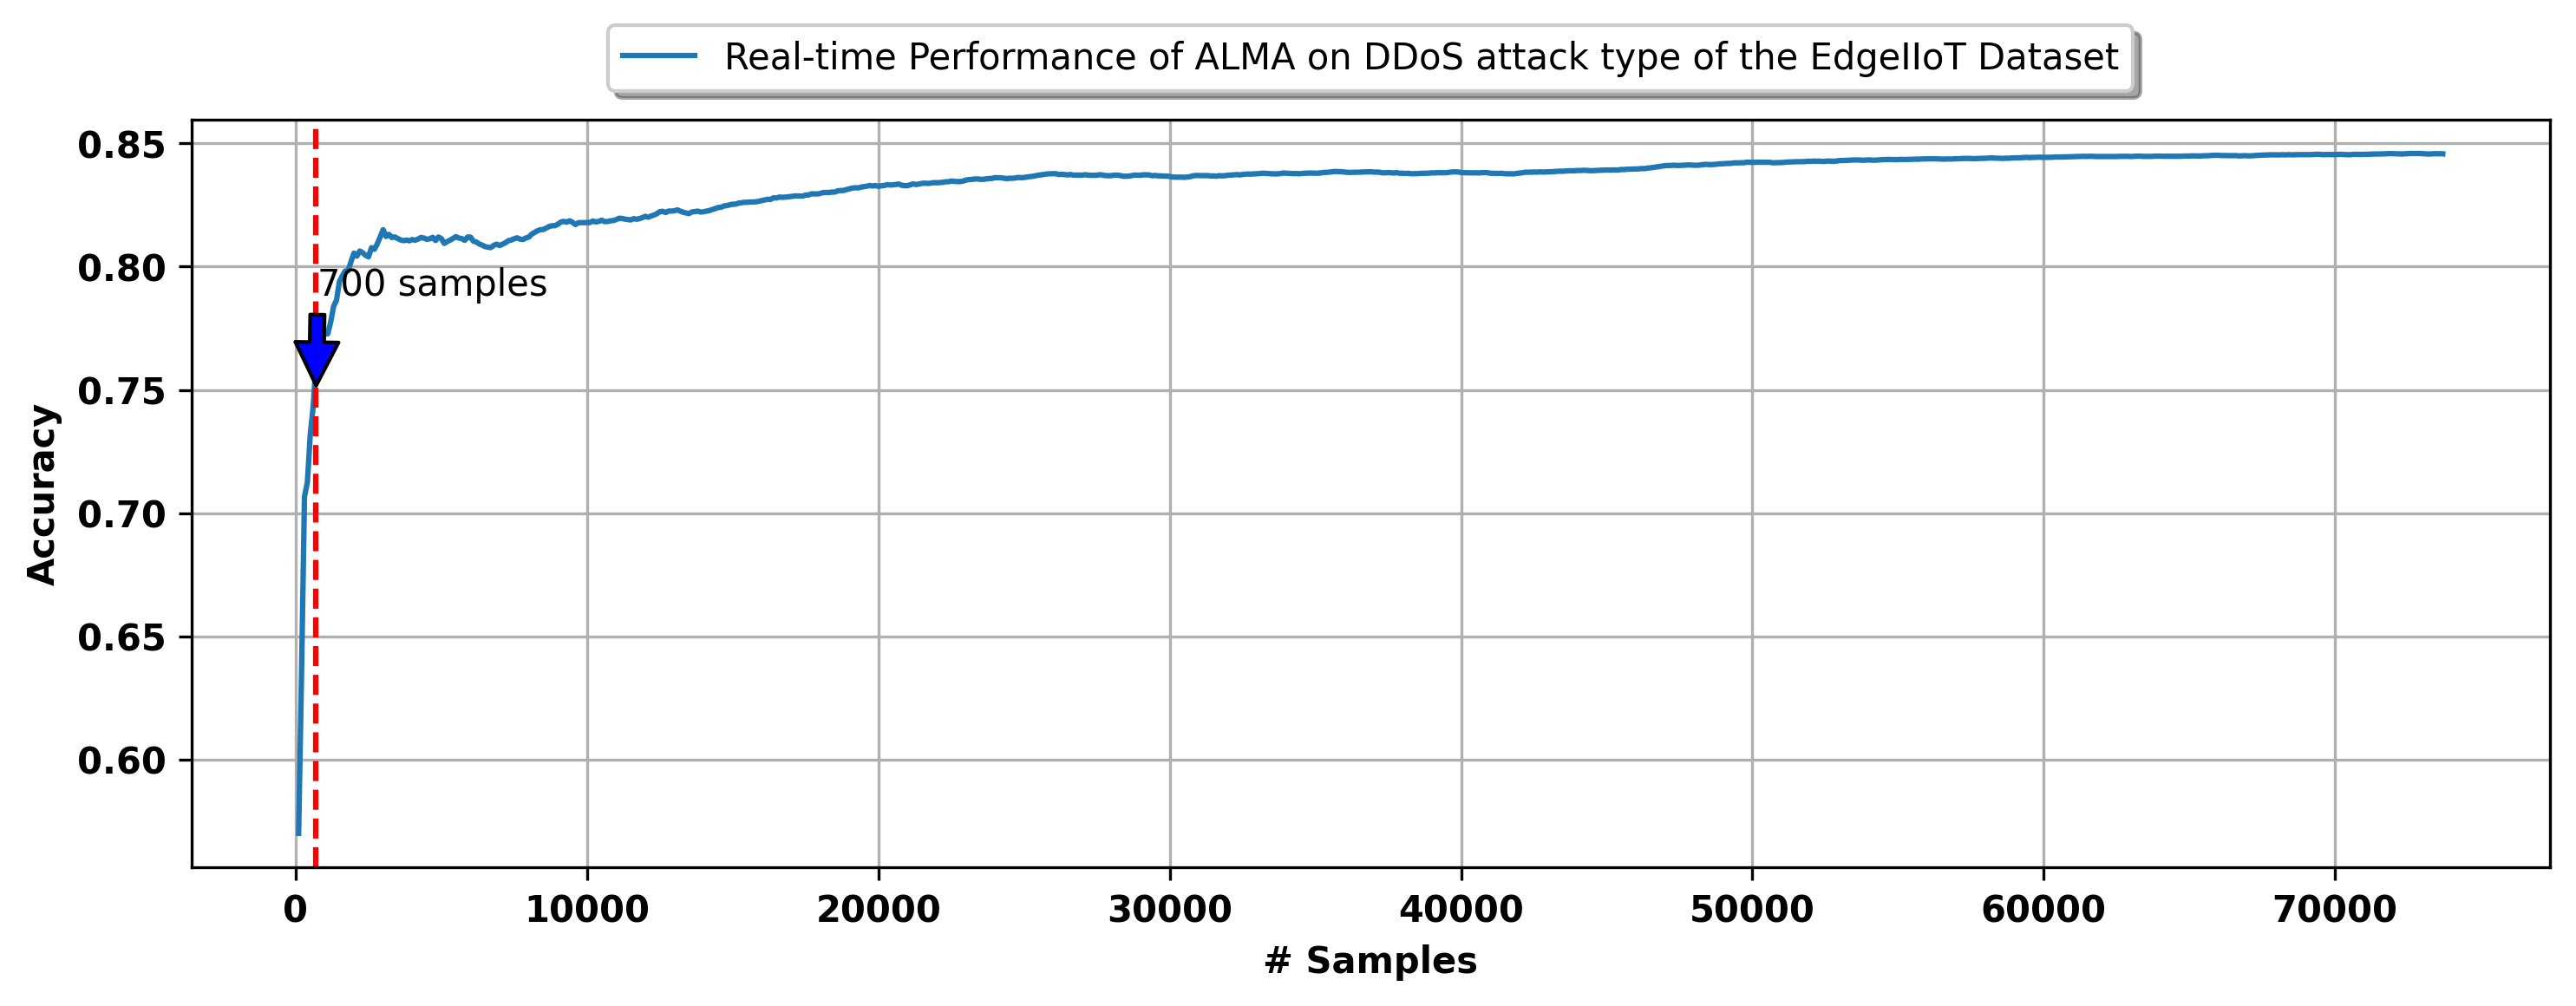

In [7]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on DDoS attack type of the EdgeIIoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [8]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_IG_Attack.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({0: 24301, 1: 21148})


In [9]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [10]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

CPU times: user 4.76 s, sys: 23.8 ms, total: 4.78 s
Wall time: 4.77 s


           Precision   Recall   F1       Support  
                                                  
       0      89.89%   91.29%   90.58%     24301  
       1      89.81%   88.20%   88.99%     21148  
                                                  
   Macro      89.85%   89.74%   89.79%            
   Micro      89.85%   89.85%   89.85%            
Weighted      89.85%   89.85%   89.84%            

                 89.85% accuracy                  

In [11]:
dataset = stream.iter_pandas(X, y)

In [12]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Information_EdgeIIoT.png')
    plt.close()

    return fig

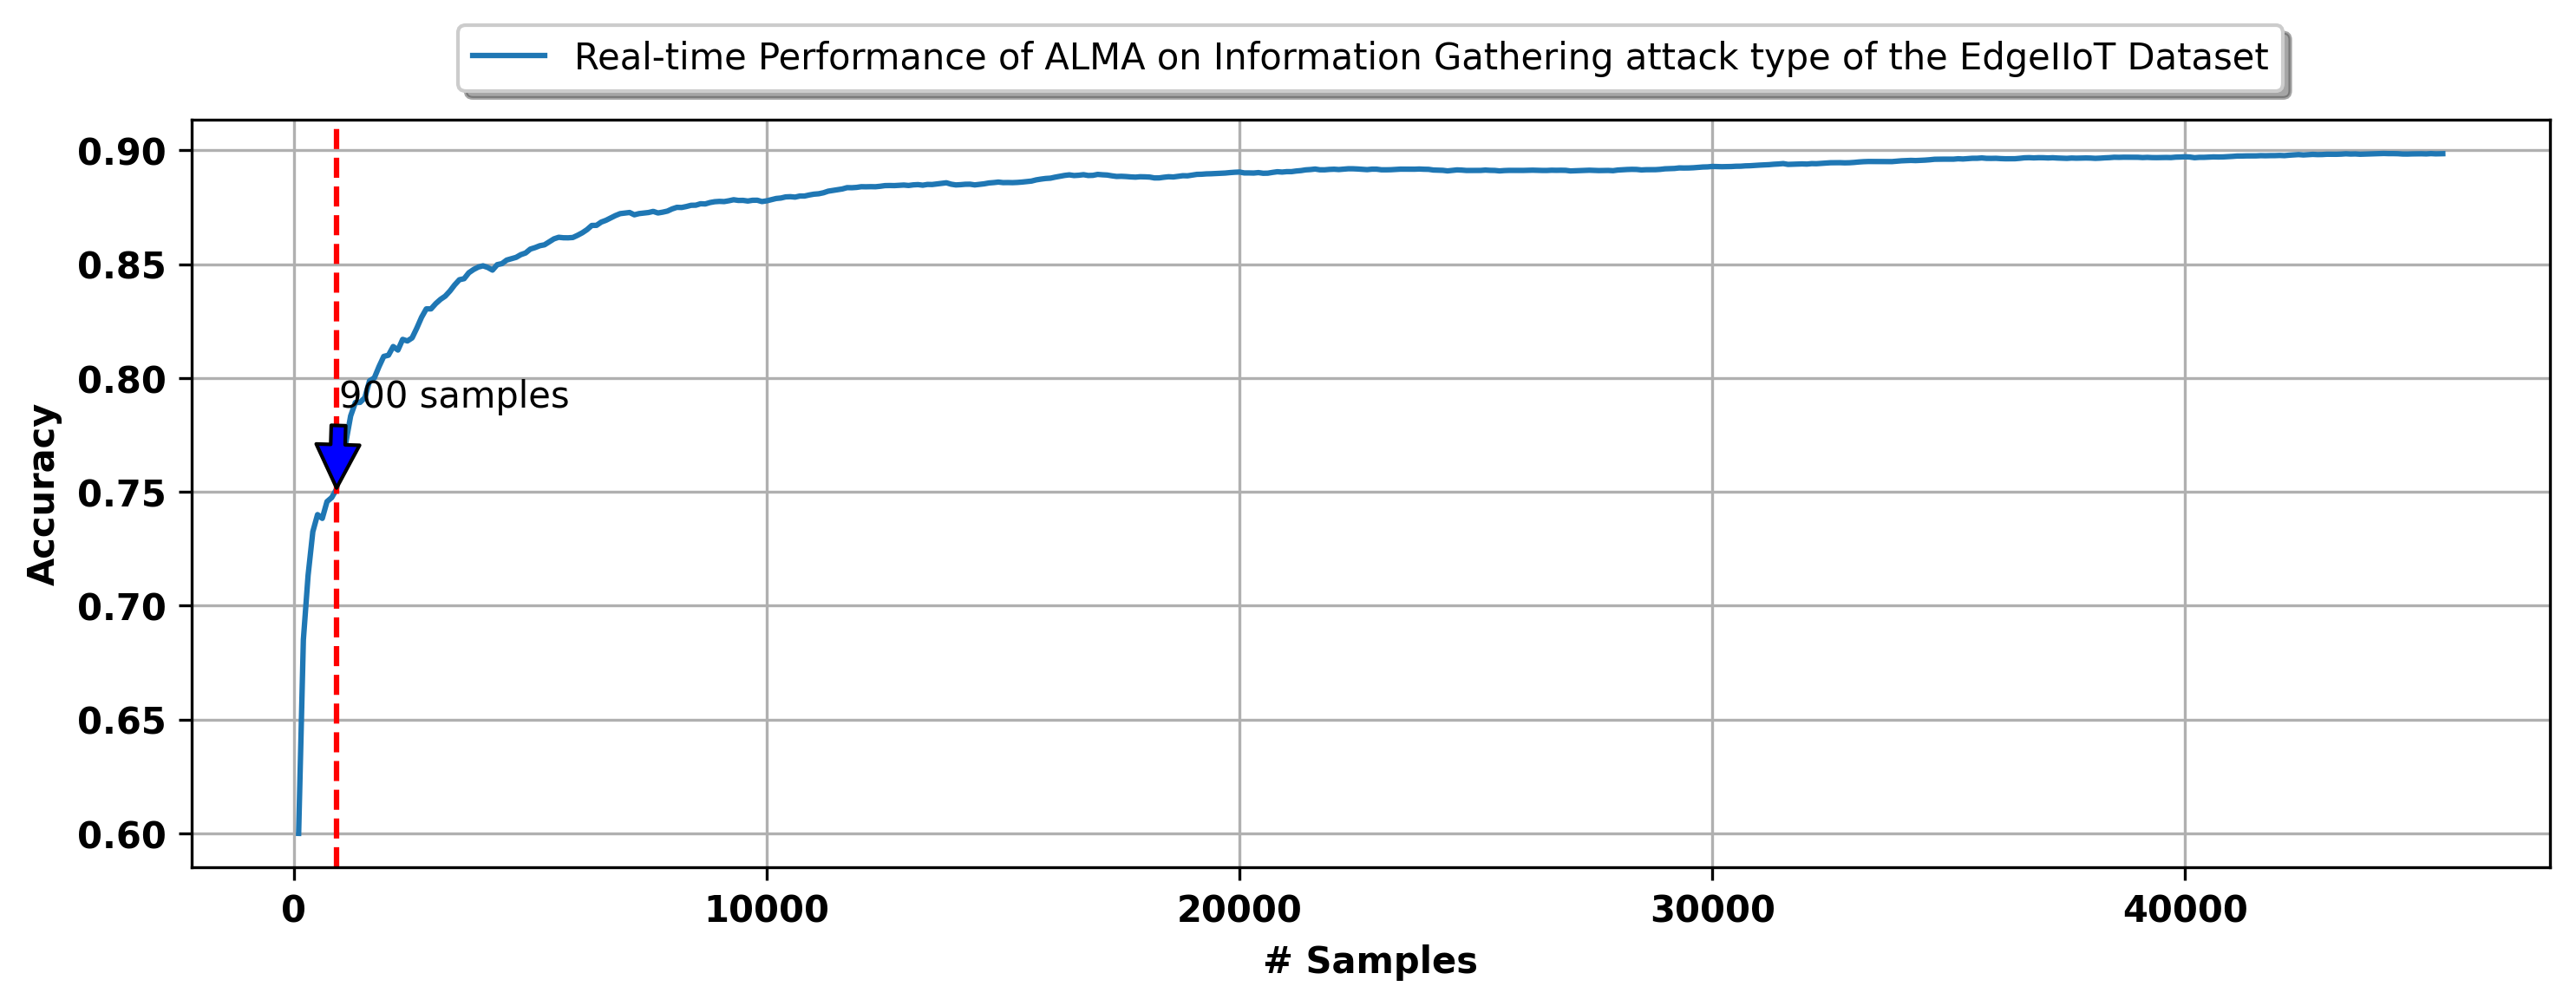

In [13]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on Information Gathering attack type of the EdgeIIoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [14]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Injection_Attack.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 30632, 0: 24301})


In [15]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [16]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      66.41%   60.63%   63.39%     22191  
       1      70.62%   75.53%   72.99%     27809  
                                                  
   Macro      68.52%   68.08%   68.19%            
   Micro      68.92%   68.92%   68.92%            
Weighted      68.75%   68.92%   68.73%            

                 68.92% accuracy                   – 00:00:05 – 14.02 KB
[54,933]            Precision   Recall   F1       Support  
                                                  
       0      66.39%   60.70%   63.42%     24301  
       1      70.81%   75.62%   73.14%     30632  
                                                  
   Macro      68.60%   68.16%   68.28%            
   Micro      69.02%   69.02%   69.02%            
Weighted      68.85%   69.02%   68.84%            

                 69.02% accuracy                   – 00:00:06 – 14.02 KB
CPU times: user 6.

           Precision   Recall   F1       Support  
                                                  
       0      66.39%   60.70%   63.42%     24301  
       1      70.81%   75.62%   73.14%     30632  
                                                  
   Macro      68.60%   68.16%   68.28%            
   Micro      69.02%   69.02%   69.02%            
Weighted      68.85%   69.02%   68.84%            

                 69.02% accuracy                  

In [17]:
dataset = stream.iter_pandas(X, y)

In [18]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Injection_EdgeIIoT.png')
    plt.close()

    return fig

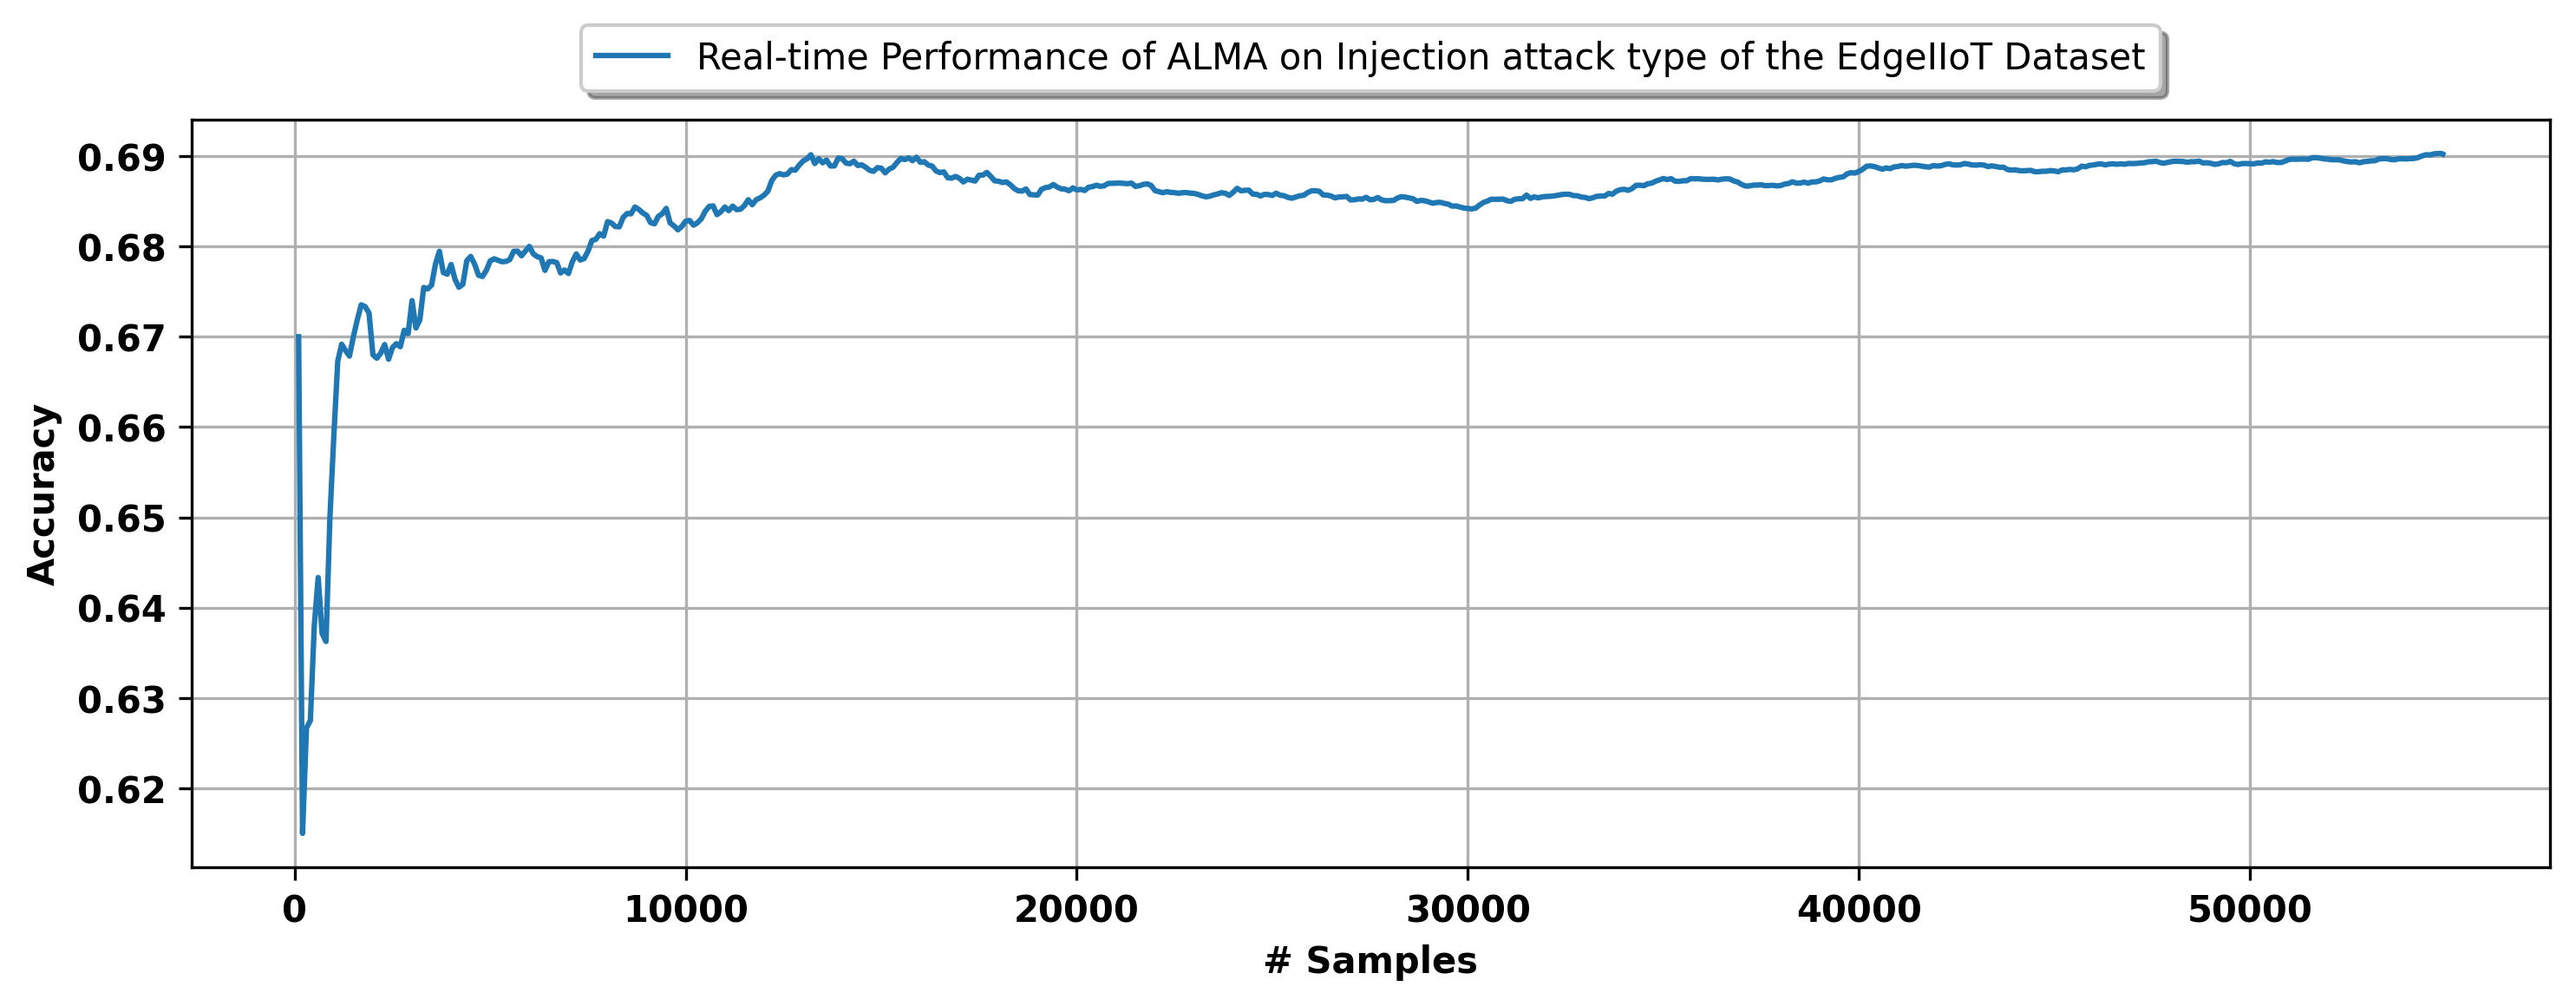

In [19]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on Injection attack type of the EdgeIIoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [20]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Malware_Attack.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 31109, 0: 24301})


In [21]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [22]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      69.26%   61.51%   65.15%     21998  
       1      72.21%   78.56%   75.25%     28002  
                                                  
   Macro      70.73%   70.03%   70.20%            
   Micro      71.06%   71.06%   71.06%            
Weighted      70.91%   71.06%   70.81%            

                 71.06% accuracy                   – 00:00:05 – 14.02 KB
[55,410]            Precision   Recall   F1       Support  
                                                  
       0      69.22%   61.69%   65.24%     24301  
       1      72.42%   78.57%   75.37%     31109  
                                                  
   Macro      70.82%   70.13%   70.31%            
   Micro      71.17%   71.17%   71.17%            
Weighted      71.02%   71.17%   70.93%            

                 71.17% accuracy                   – 00:00:06 – 14.02 KB
CPU times: user 6.

           Precision   Recall   F1       Support  
                                                  
       0      69.22%   61.69%   65.24%     24301  
       1      72.42%   78.57%   75.37%     31109  
                                                  
   Macro      70.82%   70.13%   70.31%            
   Micro      71.17%   71.17%   71.17%            
Weighted      71.02%   71.17%   70.93%            

                 71.17% accuracy                  

In [23]:
dataset = stream.iter_pandas(X, y)

In [24]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Malware_EdgeIIoT.png')
    plt.close()

    return fig

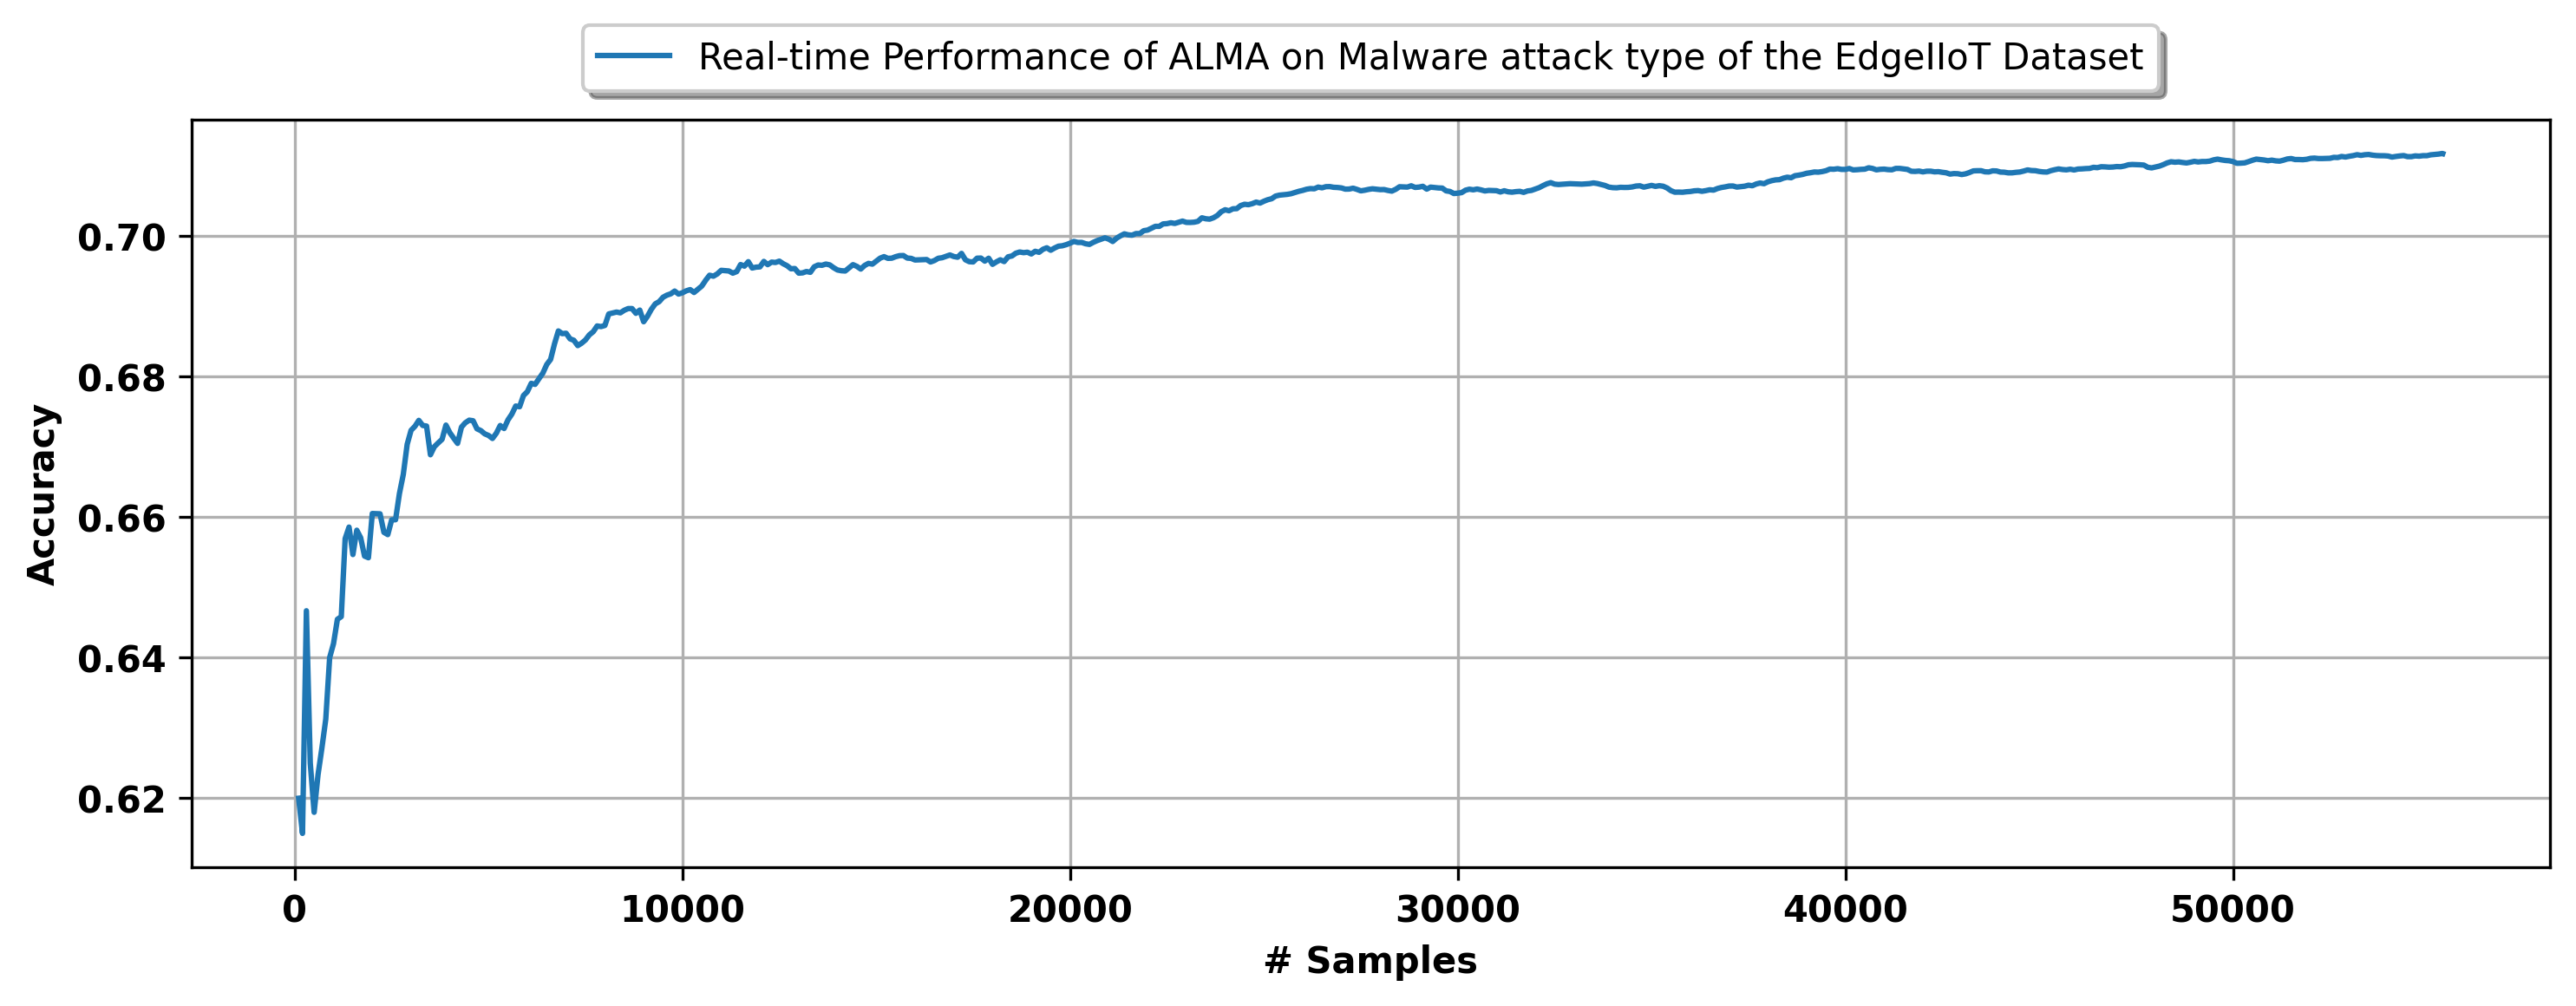

In [25]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on Malware attack type of the EdgeIIoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [26]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_DDoS_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Malware_Only.csv")
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X1 = df1.drop(['Attack_type'], axis=1)
y1 = df1['Attack_type']
X2 = df2.drop(['Attack_type'], axis=1)
y2 = df2['Attack_type']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [27]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [28]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      58.13%   52.63%   55.24%     11426  
       1      86.35%   88.77%   87.54%     38574  
                                                  
   Macro      72.24%   70.70%   71.39%            
   Micro      80.51%   80.51%   80.51%            
Weighted      79.90%   80.51%   80.16%            

                 80.51% accuracy                   – 00:00:05 – 14.02 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      59.18%   52.74%   55.77%     23148  
       1      86.22%   89.04%   87.61%     76852  
                                                  
   Macro      72.70%   70.89%   71.69%            
   Micro      80.64%   80.64%   80.64%            
Weighted      79.96%   80.64%   80.24%            

                 80.64% accuracy                   – 00:00:10 – 14.02 KB
[104,806]        

           Precision   Recall   F1       Support  
                                                  
       0      59.29%   52.82%   55.87%     24301  
       1      86.21%   89.05%   87.61%     80505  
                                                  
   Macro      72.75%   70.93%   71.74%            
   Micro      80.65%   80.65%   80.65%            
Weighted      79.97%   80.65%   80.25%            

                 80.65% accuracy                  

In [29]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_DDoS_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Injection_Only.csv")
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X1 = df1.drop(['Attack_type'], axis=1)
y1 = df1['Attack_type']
X2 = df2.drop(['Attack_type'], axis=1)
y2 = df2['Attack_type']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [30]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [31]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      55.79%   50.25%   52.88%     11455  
       1      85.64%   88.17%   86.88%     38545  
                                                  
   Macro      70.72%   69.21%   69.88%            
   Micro      79.48%   79.48%   79.48%            
Weighted      78.80%   79.48%   79.09%            

                 79.48% accuracy                   – 00:00:05 – 14.02 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      57.47%   50.77%   53.91%     23257  
       1      85.59%   88.61%   87.07%     76743  
                                                  
   Macro      71.53%   69.69%   70.49%            
   Micro      79.81%   79.81%   79.81%            
Weighted      79.05%   79.81%   79.36%            

                 79.81% accuracy                   – 00:00:10 – 14.02 KB
[104,329]        

           Precision   Recall   F1       Support  
                                                  
       0      57.61%   50.87%   54.03%     24301  
       1      85.59%   88.63%   87.09%     80028  
                                                  
   Macro      71.60%   69.75%   70.56%            
   Micro      79.84%   79.84%   79.84%            
Weighted      79.08%   79.84%   79.39%            

                 79.84% accuracy                  

In [32]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_DDoS_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_IG_Only.csv")
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X1 = df1.drop(['Attack_type'], axis=1)
y1 = df1['Attack_type']
X2 = df2.drop(['Attack_type'], axis=1)
y2 = df2['Attack_type']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [33]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [34]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      70.13%   71.54%   70.83%     12641  
       1      90.30%   89.69%   90.00%     37359  
                                                  
   Macro      80.22%   80.61%   80.41%            
   Micro      85.10%   85.10%   85.10%            
Weighted      85.20%   85.10%   85.15%            

                 85.10% accuracy                   – 00:00:05 – 14.02 KB
[94,845]            Precision   Recall   F1       Support  
                                                  
       0      71.84%   72.96%   72.39%     24301  
       1      90.63%   90.15%   90.39%     70544  
                                                  
   Macro      81.24%   81.55%   81.39%            
   Micro      85.74%   85.74%   85.74%            
Weighted      85.82%   85.74%   85.78%            

                 85.74% accuracy                   – 00:00:10 – 14.02 KB
CPU times: user 10

           Precision   Recall   F1       Support  
                                                  
       0      71.84%   72.96%   72.39%     24301  
       1      90.63%   90.15%   90.39%     70544  
                                                  
   Macro      81.24%   81.55%   81.39%            
   Micro      85.74%   85.74%   85.74%            
Weighted      85.82%   85.74%   85.78%            

                 85.74% accuracy                  

In [35]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Malware_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Injection_Only.csv")
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X1 = df1.drop(['Attack_type'], axis=1)
y1 = df1['Attack_type']
X2 = df2.drop(['Attack_type'], axis=1)
y2 = df2['Attack_type']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [36]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [37]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      62.11%   48.73%   54.61%     13927  
       1      81.72%   88.52%   84.99%     36073  
                                                  
   Macro      71.92%   68.62%   69.80%            
   Micro      77.44%   77.44%   77.44%            
Weighted      76.26%   77.44%   76.53%            

                 77.44% accuracy                   – 00:00:05 – 14.02 KB
[86,042]            Precision   Recall   F1       Support  
                                                  
       0      62.49%   49.37%   55.16%     24301  
       1      81.59%   88.34%   84.83%     61741  
                                                  
   Macro      72.04%   68.85%   70.00%            
   Micro      77.33%   77.33%   77.33%            
Weighted      76.20%   77.33%   76.45%            

                 77.33% accuracy                   – 00:00:09 – 14.02 KB
CPU times: user 9.

           Precision   Recall   F1       Support  
                                                  
       0      62.49%   49.37%   55.16%     24301  
       1      81.59%   88.34%   84.83%     61741  
                                                  
   Macro      72.04%   68.85%   70.00%            
   Micro      77.33%   77.33%   77.33%            
Weighted      76.20%   77.33%   76.45%            

                 77.33% accuracy                  

In [38]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Malware_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_IG_Only.csv")
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X1 = df1.drop(['Attack_type'], axis=1)
y1 = df1['Attack_type']
X2 = df2.drop(['Attack_type'], axis=1)
y2 = df2['Attack_type']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [39]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [40]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      62.36%   56.00%   59.01%     15747  
       1      80.68%   84.46%   82.53%     34253  
                                                  
   Macro      71.52%   70.23%   70.77%            
   Micro      75.50%   75.50%   75.50%            
Weighted      74.91%   75.50%   75.12%            

                 75.50% accuracy                   – 00:00:05 – 14.02 KB
[76,558]            Precision   Recall   F1       Support  
                                                  
       0      62.85%   56.27%   59.38%     24301  
       1      80.61%   84.54%   82.52%     52257  
                                                  
   Macro      71.73%   70.40%   70.95%            
   Micro      75.56%   75.56%   75.56%            
Weighted      74.97%   75.56%   75.18%            

                 75.56% accuracy                   – 00:00:08 – 14.02 KB
CPU times: user 8.

           Precision   Recall   F1       Support  
                                                  
       0      62.85%   56.27%   59.38%     24301  
       1      80.61%   84.54%   82.52%     52257  
                                                  
   Macro      71.73%   70.40%   70.95%            
   Micro      75.56%   75.56%   75.56%            
Weighted      74.97%   75.56%   75.18%            

                 75.56% accuracy                  

In [41]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Injection_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_IG_Only.csv")
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X1 = df1.drop(['Attack_type'], axis=1)
y1 = df1['Attack_type']
X2 = df2.drop(['Attack_type'], axis=1)
y2 = df2['Attack_type']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [42]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [43]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      61.44%   55.36%   58.24%     15843  
       1      80.20%   83.89%   82.00%     34157  
                                                  
   Macro      70.82%   69.62%   70.12%            
   Micro      74.85%   74.85%   74.85%            
Weighted      74.26%   74.85%   74.47%            

                 74.85% accuracy                   – 00:00:05 – 14.02 KB
[76,081]            Precision   Recall   F1       Support  
                                                  
       0      61.85%   55.70%   58.61%     24301  
       1      80.14%   83.88%   81.97%     51780  
                                                  
   Macro      71.00%   69.79%   70.29%            
   Micro      74.88%   74.88%   74.88%            
Weighted      74.30%   74.88%   74.51%            

                 74.88% accuracy                   – 00:00:08 – 14.02 KB
CPU times: user 8.

           Precision   Recall   F1       Support  
                                                  
       0      61.85%   55.70%   58.61%     24301  
       1      80.14%   83.88%   81.97%     51780  
                                                  
   Macro      71.00%   69.79%   70.29%            
   Micro      74.88%   74.88%   74.88%            
Weighted      74.30%   74.88%   74.51%            

                 74.88% accuracy                  

In [44]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_DDoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 49396, 0: 24301})


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [46]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 391 ms, sys: 4.01 ms, total: 395 ms
Wall time: 393 ms


           Precision   Recall   F1       Support  
                                                  
       0      66.90%   72.37%   69.53%      1187  
       1      86.33%   82.98%   84.62%      2497  
                                                  
   Macro      76.62%   77.67%   77.07%            
   Micro      79.56%   79.56%   79.56%            
Weighted      80.07%   79.56%   79.76%            

                 79.56% accuracy                  

In [47]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.8466856155285447
Precision: 0.9501157493839145
Recall: 0.8138553060832854
F1_Score: 0.8767227122381477


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [49]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      68.30%   72.68%   70.43%      1607  
       1      86.66%   84.03%   85.32%      3393  
                                                  
   Macro      77.48%   78.35%   77.87%            
   Micro      80.38%   80.38%   80.38%            
Weighted      80.76%   80.38%   80.53%            

                 80.38% accuracy                   – 00:00:00 – 14.02 KB
[7,369]            Precision   Recall   F1       Support  
                                                  
       0      70.10%   73.20%   71.61%      2373  
       1      87.00%   85.17%   86.07%      4996  
                                                  
   Macro      78.55%   79.18%   78.84%            
   Micro      81.31%   81.31%   81.31%            
Weighted      81.55%   81.31%   81.42%            

                 81.31% accuracy                   – 00:00:00 – 14.02 KB
CPU times: user 785 

           Precision   Recall   F1       Support  
                                                  
       0      70.10%   73.20%   71.61%      2373  
       1      87.00%   85.17%   86.07%      4996  
                                                  
   Macro      78.55%   79.18%   78.84%            
   Micro      81.31%   81.31%   81.31%            
Weighted      81.55%   81.31%   81.42%            

                 81.31% accuracy                  

In [50]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.8829302858521288
Precision: 0.9170936083976592
Recall: 0.9071171171171171
F1_Score: 0.9120780823623991


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [52]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      68.78%   73.92%   71.26%      1603  
       1      87.24%   84.16%   85.68%      3397  
                                                  
   Macro      78.01%   79.04%   78.47%            
   Micro      80.88%   80.88%   80.88%            
Weighted      81.32%   80.88%   81.05%            

                 80.88% accuracy                   – 00:00:00 – 14.02 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      71.09%   73.44%   72.24%      3211  
       1      87.24%   85.87%   86.55%      6789  
                                                  
   Macro      79.16%   79.65%   79.40%            
   Micro      81.88%   81.88%   81.88%            
Weighted      82.05%   81.88%   81.96%            

                 81.88% accuracy                   – 00:00:01 – 14.02 KB
[11,054]           

           Precision   Recall   F1       Support  
                                                  
       0      71.44%   73.62%   72.51%      3571  
       1      87.23%   85.95%   86.59%      7483  
                                                  
   Macro      79.33%   79.79%   79.55%            
   Micro      81.97%   81.97%   81.97%            
Weighted      82.13%   81.97%   82.04%            

                 81.97% accuracy                  

In [53]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.8081030601982664
Precision: 0.8410304385524574
Recall: 0.8794168873619164
F1_Score: 0.8597954256522702


In [54]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Malware_Attack.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 31109, 0: 24301})


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [56]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 304 ms, sys: 4.36 ms, total: 308 ms
Wall time: 306 ms


           Precision   Recall   F1       Support  
                                                  
       0      66.20%   54.01%   59.49%      1233  
       1      67.86%   77.88%   72.52%      1537  
                                                  
   Macro      67.03%   65.95%   66.01%            
   Micro      67.26%   67.26%   67.26%            
Weighted      67.12%   67.26%   66.72%            

                 67.26% accuracy                  

In [57]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.7104103343465046
Precision: 0.6939886271324127
Recall: 0.8666644122818883
F1_Score: 0.7707738113139455


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [59]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      68.27%   55.96%   61.50%      2207  
       1      69.54%   79.45%   74.16%      2793  
                                                  
   Macro      68.90%   67.70%   67.83%            
   Micro      69.08%   69.08%   69.08%            
Weighted      68.98%   69.08%   68.58%            

                 69.08% accuracy                   – 00:00:00 – 14.02 KB
[5,541]            Precision   Recall   F1       Support  
                                                  
       0      68.48%   56.03%   61.64%      2420  
       1      70.12%   80.01%   74.74%      3121  
                                                  
   Macro      69.30%   68.02%   68.19%            
   Micro      69.54%   69.54%   69.54%            
Weighted      69.41%   69.54%   69.02%            

                 69.54% accuracy                   – 00:00:00 – 14.02 KB
CPU times: user 610 

           Precision   Recall   F1       Support  
                                                  
       0      68.48%   56.03%   61.64%      2420  
       1      70.12%   80.01%   74.74%      3121  
                                                  
   Macro      69.30%   68.02%   68.19%            
   Micro      69.54%   69.54%   69.54%            
Weighted      69.41%   69.54%   69.02%            

                 69.54% accuracy                  

In [60]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.6282259519942248
Precision: 0.6458204716631682
Recall: 0.7475346577104474
F1_Score: 0.6929650238473768


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [62]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      66.80%   53.91%   59.67%      2224  
       1      68.02%   78.53%   72.90%      2776  
                                                  
   Macro      67.41%   66.22%   66.28%            
   Micro      67.58%   67.58%   67.58%            
Weighted      67.48%   67.58%   67.01%            

                 67.58% accuracy                   – 00:00:00 – 14.02 KB
[8,311]            Precision   Recall   F1       Support  
                                                  
       0      67.85%   56.18%   61.47%      3626  
       1      70.07%   79.40%   74.44%      4685  
                                                  
   Macro      68.96%   67.79%   67.96%            
   Micro      69.27%   69.27%   69.27%            
Weighted      69.10%   69.27%   68.78%            

                 69.27% accuracy                   – 00:00:00 – 14.02 KB
CPU times: user 901 

           Precision   Recall   F1       Support  
                                                  
       0      67.85%   56.18%   61.47%      3626  
       1      70.07%   79.40%   74.44%      4685  
                                                  
   Macro      68.96%   67.79%   67.96%            
   Micro      69.27%   69.27%   69.27%            
Weighted      69.10%   69.27%   68.78%            

                 69.27% accuracy                  

In [63]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.7017134121743561
Precision: 0.7308682511846573
Recall: 0.7412957917045111
F1_Score: 0.7360450915922968


In [64]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_IG_Attack.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({0: 24301, 1: 21148})


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [66]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 246 ms, sys: 2.79 ms, total: 249 ms
Wall time: 248 ms


           Precision   Recall   F1       Support  
                                                  
       0      86.76%   78.58%   82.47%      1209  
       1      77.99%   86.36%   81.96%      1063  
                                                  
   Macro      82.38%   82.47%   82.21%            
   Micro      82.22%   82.22%   82.22%            
Weighted      82.66%   82.22%   82.23%            

                 82.22% accuracy                  

In [67]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.91469995599509
Precision: 0.9148624038850668
Recall: 0.9004232013940752
F1_Score: 0.9075853762577473


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [69]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 493 ms, sys: 5.07 ms, total: 498 ms
Wall time: 496 ms


           Precision   Recall   F1       Support  
                                                  
       0      86.74%   84.84%   85.78%      2414  
       1      83.23%   85.31%   84.26%      2130  
                                                  
   Macro      84.99%   85.07%   85.02%            
   Micro      85.06%   85.06%   85.06%            
Weighted      85.10%   85.06%   85.07%            

                 85.06% accuracy                  

In [70]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.8799657743552133
Precision: 0.8379323560410079
Recall: 0.9197076453885792
F1_Score: 0.8769176777298706


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [72]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      87.49%   86.35%   86.92%      2631  
       1      85.06%   86.28%   85.67%      2369  
                                                  
   Macro      86.27%   86.32%   86.29%            
   Micro      86.32%   86.32%   86.32%            
Weighted      86.34%   86.32%   86.32%            

                 86.32% accuracy                   – 00:00:00 – 14.02 KB
[6,817]            Precision   Recall   F1       Support  
                                                  
       0      88.49%   87.86%   88.17%      3640  
       1      86.20%   86.91%   86.55%      3177  
                                                  
   Macro      87.34%   87.38%   87.36%            
   Micro      87.41%   87.41%   87.41%            
Weighted      87.42%   87.41%   87.42%            

                 87.41% accuracy                   – 00:00:00 – 14.02 KB
CPU times: user 726 

           Precision   Recall   F1       Support  
                                                  
       0      88.49%   87.86%   88.17%      3640  
       1      86.20%   86.91%   86.55%      3177  
                                                  
   Macro      87.34%   87.38%   87.36%            
   Micro      87.41%   87.41%   87.41%            
Weighted      87.42%   87.41%   87.42%            

                 87.41% accuracy                  

In [73]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.9302909505073514
Precision: 0.9487721771824698
Recall: 0.8986700795726448
F1_Score: 0.9230417512073843


In [74]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/Edge_Injection_Attack.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 30632, 0: 24301})


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [76]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 307 ms, sys: 4.34 ms, total: 312 ms
Wall time: 308 ms


           Precision   Recall   F1       Support  
                                                  
       0      63.79%   55.90%   59.58%      1204  
       1      68.60%   75.23%   71.76%      1542  
                                                  
   Macro      66.19%   65.56%   65.67%            
   Micro      66.75%   66.75%   66.75%            
Weighted      66.49%   66.75%   66.42%            

                 66.75% accuracy                  

In [77]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.6581907371567631
Precision: 0.6950898120535405
Recall: 0.6890684083877621
F1_Score: 0.6920660129816323


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [79]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      65.61%   57.20%   61.12%      2208  
       1      69.27%   76.29%   72.61%      2792  
                                                  
   Macro      67.44%   66.75%   66.86%            
   Micro      67.86%   67.86%   67.86%            
Weighted      67.65%   67.86%   67.53%            

                 67.86% accuracy                   – 00:00:00 – 14.02 KB
[5,493]            Precision   Recall   F1       Support  
                                                  
       0      65.19%   57.31%   60.99%      2408  
       1      69.55%   76.11%   72.68%      3085  
                                                  
   Macro      67.37%   66.71%   66.84%            
   Micro      67.87%   67.87%   67.87%            
Weighted      67.64%   67.87%   67.56%            

                 67.87% accuracy                   – 00:00:00 – 14.02 KB
CPU times: user 623 

           Precision   Recall   F1       Support  
                                                  
       0      65.19%   57.31%   60.99%      2408  
       1      69.55%   76.11%   72.68%      3085  
                                                  
   Macro      67.37%   66.71%   66.84%            
   Micro      67.87%   67.87%   67.87%            
Weighted      67.64%   67.87%   67.56%            

                 67.87% accuracy                  

In [80]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.6774069579288026
Precision: 0.6767018099823268
Recall: 0.8061857915562494
F1_Score: 0.735790607139899


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['Attack_type'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [82]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      66.70%   57.62%   61.83%      2218  
       1      69.52%   77.07%   73.10%      2782  
                                                  
   Macro      68.11%   67.34%   67.46%            
   Micro      68.44%   68.44%   68.44%            
Weighted      68.27%   68.44%   68.10%            

                 68.44% accuracy                   – 00:00:00 – 14.02 KB
[8,239]            Precision   Recall   F1       Support  
                                                  
       0      66.33%   58.41%   62.12%      3640  
       1      69.92%   76.54%   73.08%      4599  
                                                  
   Macro      68.13%   67.47%   67.60%            
   Micro      68.53%   68.53%   68.53%            
Weighted      68.34%   68.53%   68.24%            

                 68.53% accuracy                   – 00:00:00 – 14.02 KB
CPU times: user 898 

           Precision   Recall   F1       Support  
                                                  
       0      66.33%   58.41%   62.12%      3640  
       1      69.92%   76.54%   73.08%      4599  
                                                  
   Macro      68.13%   67.47%   67.60%            
   Micro      68.53%   68.53%   68.53%            
Weighted      68.34%   68.53%   68.24%            

                 68.53% accuracy                  

In [83]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.6333576048314559
Precision: 0.6628659138252384
Recall: 0.6967310721007951
F1_Score: 0.679376732339501


In [84]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/EdgeIIoT/EdgeIIoT.csv")
print('Original dataset shape  %s' % Counter(df['Attack_type']))
X = df.drop(['Attack_type'], axis=1)
y = df['Attack_type']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 133499, 0: 24301})


In [85]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X, y)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [86]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      29.55%   50.25%   37.22%       788  
       1      89.29%   77.59%   83.03%      4212  
                                                  
   Macro      59.42%   63.92%   60.12%            
   Micro      73.28%   73.28%   73.28%            
Weighted      79.88%   73.28%   75.81%            

                 73.28% accuracy                   – 00:00:00 – 14.02 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      34.36%   47.46%   39.86%      1597  
       1      89.24%   82.77%   85.88%      8403  
                                                  
   Macro      61.80%   65.12%   62.87%            
   Micro      77.13%   77.13%   77.13%            
Weighted      80.47%   77.13%   78.53%            

                 77.13% accuracy                   – 00:00:01 – 14.02 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0      53.22%   41.97%   46.93%     24301  
       1      89.83%   93.28%   91.52%    133499  
                                                  
   Macro      71.52%   67.63%   69.23%            
   Micro      85.38%   85.38%   85.38%            
Weighted      84.19%   85.38%   84.66%            

                 85.38% accuracy                  

In [87]:
dataset = stream.iter_pandas(X, y)

In [88]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Performance_ALMA_EdgeIIoT.png')
    plt.close()

    return fig

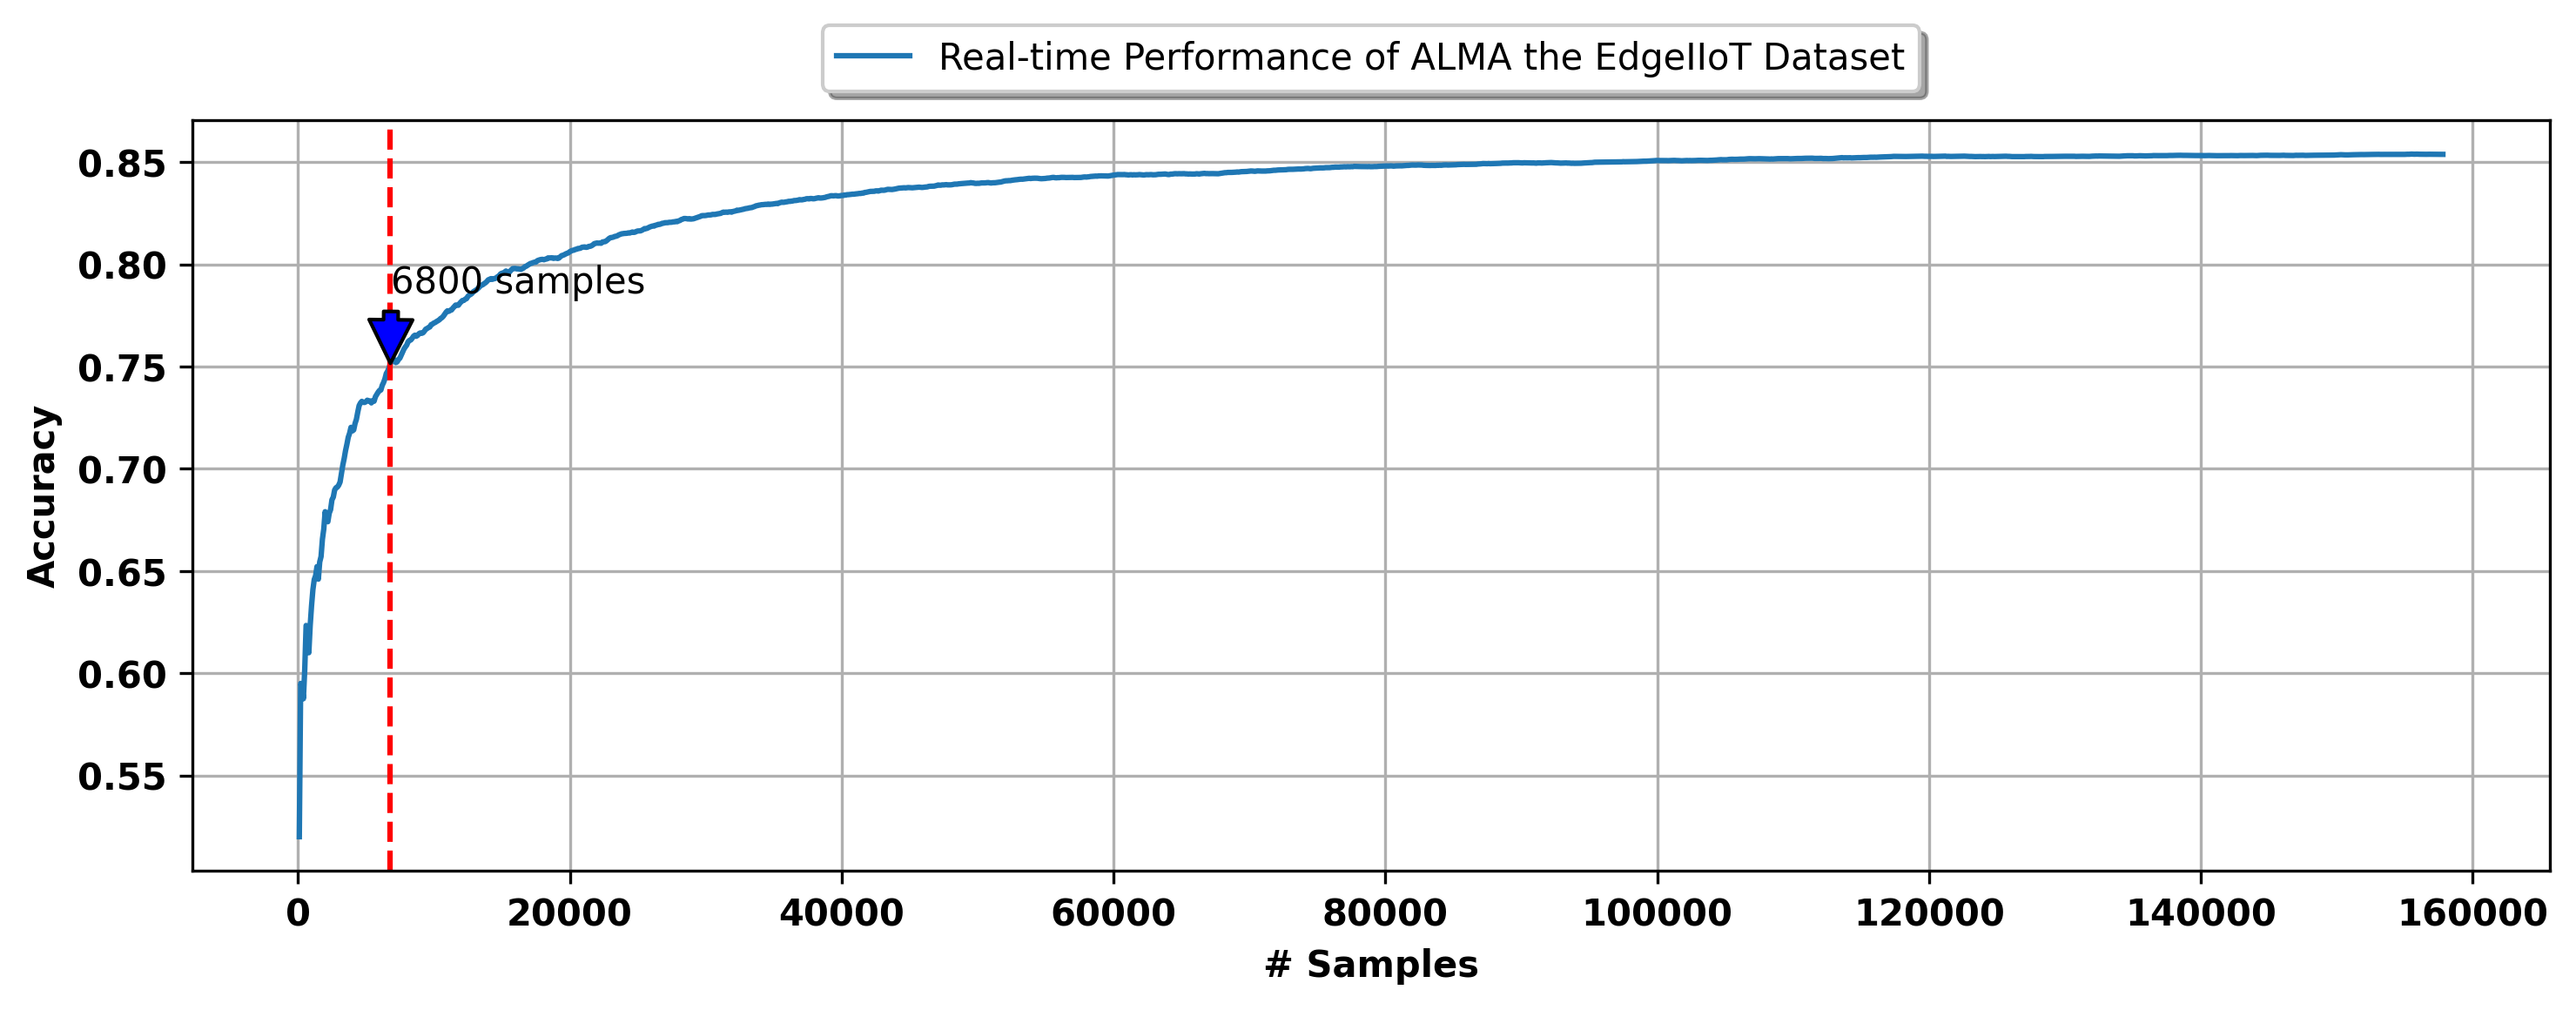

In [89]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA the EdgeIIoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)